In [1]:
import tiktoken
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
SEP = "\n----------------------------------------------------------------------------------------\n"

In [7]:
with open("strings.txt") as f:
    strings = f.read()

In [8]:
strings = map(lambda x: x.strip("f").strip("\"'").strip(), strings.split(SEP))
strings = list(set(list(strings)))
print(len(strings))

8473


In [17]:
enc = tiktoken.encoding_for_model("gpt-3.5-turbo")

In [23]:
enc.encode(strings[4])

[14372, 279, 2768, 1495, 1139, 6498, 7338, 77, 90, 3902, 62521, 92]

In [55]:
freq = defaultdict(int)

In [56]:
for prompt in strings:
    tokens = enc.encode(prompt, disallowed_special=())
    for token in tokens:
        if freq.get(str(token)) is not None:
            freq[str(token)] += 1
        else:
            freq[str(token)] = 1

In [57]:
freq = {
    k: v
    for k, v in sorted(freq.items(), key=lambda item: item[1], reverse=True)[:10]
}

In [58]:
freq

{'279': 15763,
 '11': 10667,
 '13': 9787,
 '264': 7133,
 '311': 6870,
 '25': 6468,
 '323': 5814,
 '315': 4965,
 '220': 4614,
 '314': 4143}

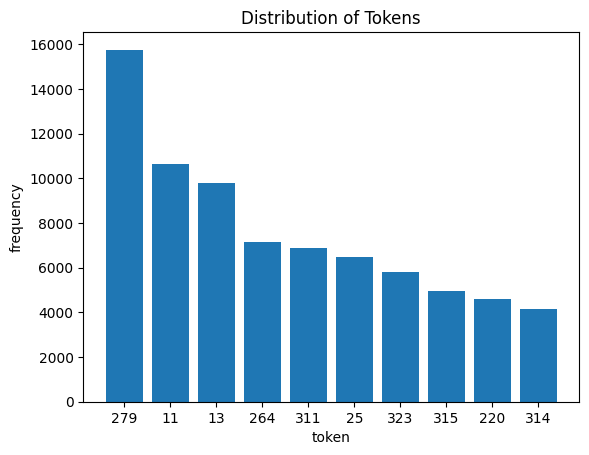

In [59]:
tokens = freq.keys()
counts = freq.values()

plt.xlabel("token")
plt.ylabel("frequency")
plt.title("Distribution of Tokens")
plt.bar(tokens, counts)
plt.show()